# Deep Neural Network for image classification (step by step)

Here we build a deep neural network for image classification from scratch, using Numpy. The key steps of the program are the following:

- Initialize the parameters for an $L$-layer neural network.
- Implement the forward propagation.
- Compute the loss function.
- Implement the backward propagation.
- Finally update the parameters.

In [1]:
# Import standard packages
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl

# Import a file containing all the functions needed to 
# build our neural network from scratch.
from NN_prop_utils import *

%matplotlib inline

# Set the following values globally
# Ticks label size
label_size = 9
mpl.rcParams['xtick.labelsize'] = label_size     
mpl.rcParams['ytick.labelsize'] = label_size
#Line width
mpl.rcParams['axes.linewidth'] = 1.5
plt.rc('font', family='Helvetica')

In [2]:
# Load data into the notebook
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

## Data set

For this classification problem of *cat vs. non-cat* we use the train_catvnoncat.h5 and test_catvnoncat.h5 datasets.

**Datasets:** it contains
   - training set made of *m_train* images labelled as cat (1) or non-cat (0)
   - test set made of *m_test* images labelled as cat (1) or non-cat (0)
   
Note that each image is of shape (num_px, num_px, 3), where num_px represents the number of pixel along one dimension and 3 is for the 3 color channes (RGB).
Images are thus stored as 3 matrices containing the red, green, and blue color codes.
The training set *train_x_orig* is hence of shape (m_train, num_px, num_px, 3) = (209, 64, 64, 3).

y = 1: it's a cat picture.


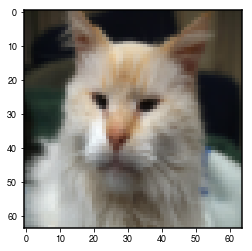

In [3]:
# Display the example of a picture
index = 27
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0, index]) + ": it's a " + classes[train_y[0, index]].decode("utf-8") +  " picture.")

### Reshape the dataset

Before feeding the dataset to the neural network, we need to reshape the images by unrolling them into a (num_px $*$ num_px $*$ 3)-dimensional vector.
The columns of the resulting matrix correspond to different training examples.

In [4]:
# Reshape the training and test examples by unrolling them
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # "-1" flattens the remaining dimensions.
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
# This is a simpler/shorter implementation of feature scaling and mean normalization,
# but for images should work quite well.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


Here 12288 simply corresponds to 64$*$64$*$3, which is the size of one reshaped image vector.

## L-layer neural network

We build now our neural network using the gradient descent algorithm.

In [5]:
### Shape of the deep neural network ###
layers_dims = [12288, 20, 7, 5, 1]   # 4-layer model

In [6]:
# Here we define the L-layer model.

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = []      # Keeps track of the cost function
    iters = []      # Keeps track of the number of iterations
    
    # Parameters initialization
    parameters = initialize_parameters(layers_dims)
    
    # Iterate using gradient descent
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 200 training example
        if print_cost and i % 200 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 200 == 0:
            costs.append(cost)
            iters.append(i)
            
    # Plot the cost
    fig = plt.figure(dpi=150, figsize=(2, 1.6))
    plt.plot(iters, costs)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate = " + str(learning_rate), fontsize = 10)
    plt.show()
    
    return parameters

## Training of the neural network

We will now train the neural network using gradient descent.

Cost after iteration 0: 0.693147
Cost after iteration 200: 0.667596
Cost after iteration 400: 0.655454
Cost after iteration 600: 0.649613
Cost after iteration 800: 0.646768
Cost after iteration 1000: 0.645367
Cost after iteration 1200: 0.644672
Cost after iteration 1400: 0.644325
Cost after iteration 1600: 0.644151
Cost after iteration 1800: 0.644063
Cost after iteration 2000: 0.644019
Cost after iteration 2200: 0.643997
Cost after iteration 2400: 0.643985


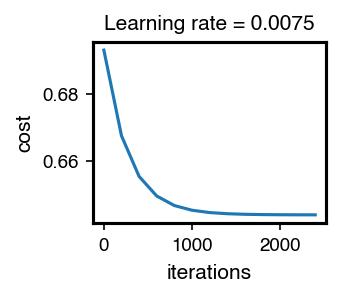

In [7]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

## Performance

Here we look at the performance of the neural network on the training set and the test set.

In [10]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 65.5502392344


In [11]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 34.0
